### Importing Needed packages


In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data in


In [216]:
df = pd.read_csv("HousePrice.csv")

# take a look at the dataset
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


### Types Columns

Columns whose variable type should be changed.


In [217]:
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

In [218]:
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [219]:
df[['Parking','Warehouse','Elevator']] = df[['Parking','Warehouse','Elevator']].astype(int)


### Data Exploration

Let's first have a descriptive exploration on our data.


In [220]:
# summarize the data
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,3473.000000,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3.479000e+03
mean,106.774547,2.079908,0.847945,0.914631,0.787295,5.359023e+09,1.786341e+05
std,69.365567,0.758275,0.359126,0.279471,0.409279,8.099935e+09,2.699978e+05
min,30.000000,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04
50%,90.000000,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06


In [221]:
df.shape

(3479, 8)

### Drop Line

Deleting the lines whose address column is empty or the size of the house is an unrealistic number.


In [234]:
df = df.dropna(subset = ['Address', 'Area'])
df.shape

(3450, 10)

### make columns

Let's make a column in the range of 0 to 5 columns in the data frame with three columns of parking and warehouse and elevator.
(Parking * 2)
(Warehouse * 1)
(Elevator * 2)


In [235]:
df['PWE'] = df.Parking + df.Warehouse + df.Elevator

Let's create a column number for each unique address.

In [236]:
df['ACode'], unique_addresses = pd.factorize(df['Address'])

Let's select some features to explore more.


In [237]:
cdf = df[['Area','Room','PWE','ACode','Price(USD)']]
cdf.head(9)

,Area,Room,PWE,ACode,Price(USD)
0,63.0,1,3,0,61666.67
1,60.0,1,3,0,61666.67
2,79.0,2,3,1,18333.33
3,95.0,2,3,2,30083.33
4,123.0,2,3,3,233333.33
5,70.0,2,2,4,68333.33
6,87.0,2,3,1,20000.00
7,59.0,1,3,0,71666.67
8,54.0,2,2,5,16433.33


We can plot each of these features:


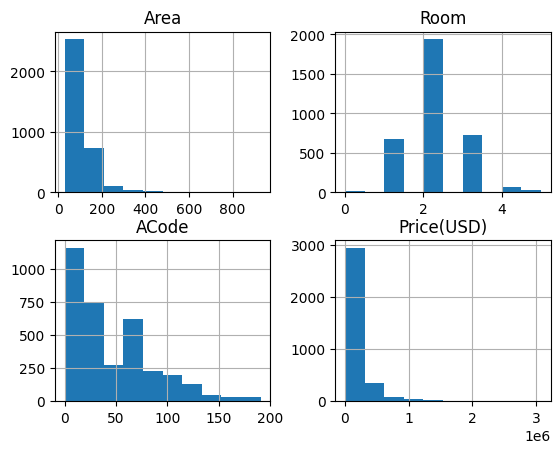

In [238]:
viz = cdf[['Area','Room','ACode','Price(USD)']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


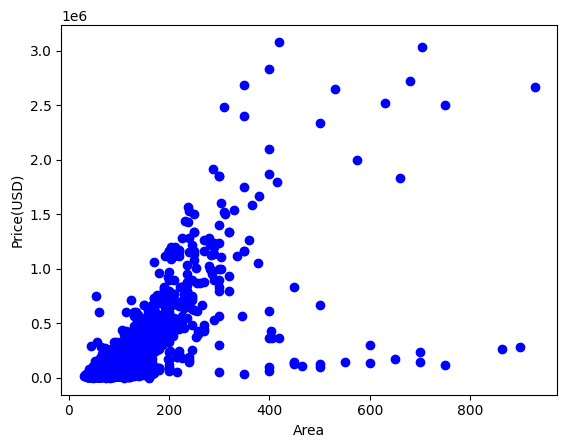

In [239]:
plt.scatter(cdf.Area, cdf['Price(USD)'],  color='blue')
plt.xlabel("Area")
plt.ylabel("Price(USD)")
plt.show()

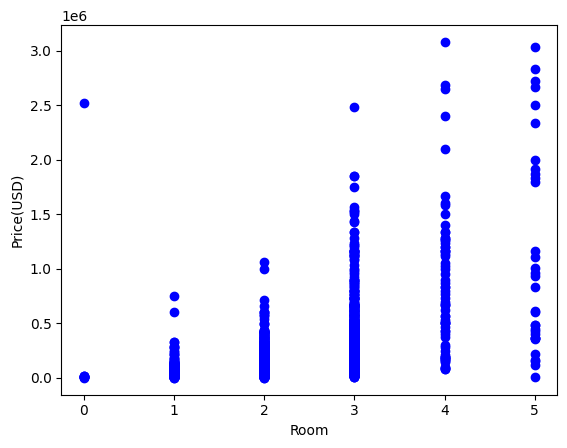

In [240]:
plt.scatter(cdf.Room, cdf['Price(USD)'],  color='blue')
plt.xlabel("Room")
plt.ylabel("Price(USD)")
plt.show()

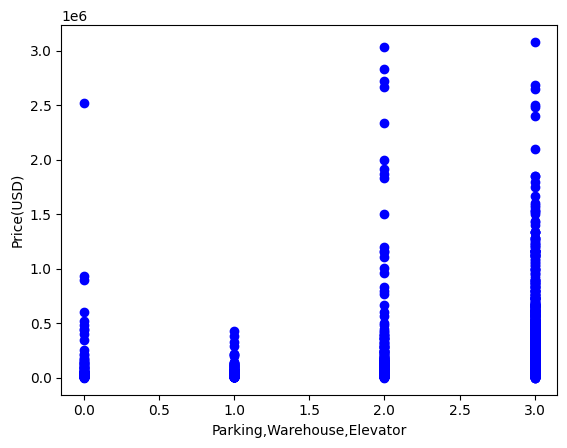

In [241]:
plt.scatter(cdf.PWE, cdf['Price(USD)'],  color='blue')
plt.xlabel("Parking,Warehouse,Elevator")
plt.ylabel("Price(USD)")
plt.show()

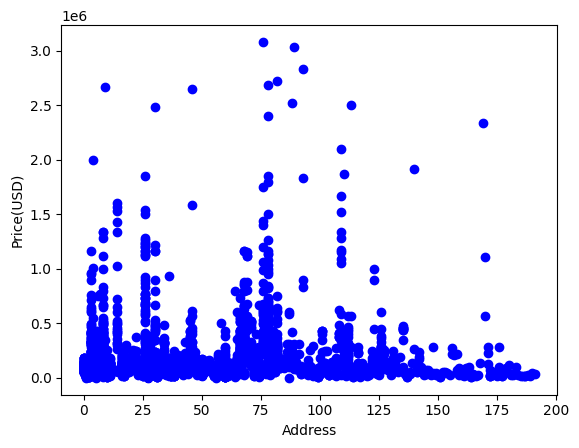

In [242]:
plt.scatter(cdf.ACode, cdf['Price(USD)'],  color='blue')
plt.xlabel("Address")
plt.ylabel("Price(USD)")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  **np.random.rand()** function:


In [243]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In [244]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Area','Room','PWE','ACode']])
y_train = np.asanyarray(train[['Price(USD)']])
regr.fit (x_train, y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[ 2292.45461364 52918.17636895 21763.65364642   245.4919068 ]]
Intercept:  [-243507.67827335]


<h2 id="prediction">Prediction</h2>


In [245]:
y_hat= regr.predict(test[['Area','Room','PWE','ACode']])
x_test = np.asanyarray(test[['Area','Room','PWE', 'ACode']])
y_test = np.asanyarray(test[['Price(USD)']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 32621558896.00
Variance score: 0.55


c:\Users\M7600QE\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
